Mean absolute error: 574.26
Mean squared error: 405557.37
Root mean squared error: 636.83


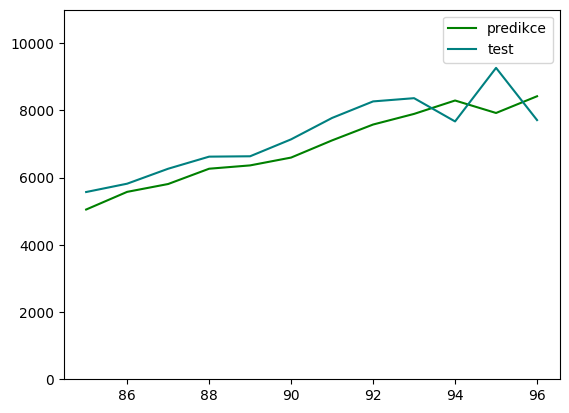

1
                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              2853.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                    6.61e-91
Time:                        15:17:25   Log-Likelihood:                         -625.87
No. Observations:                  84   AIC:                                      1268.
Df Residuals:                      76   BIC:                                      1287.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

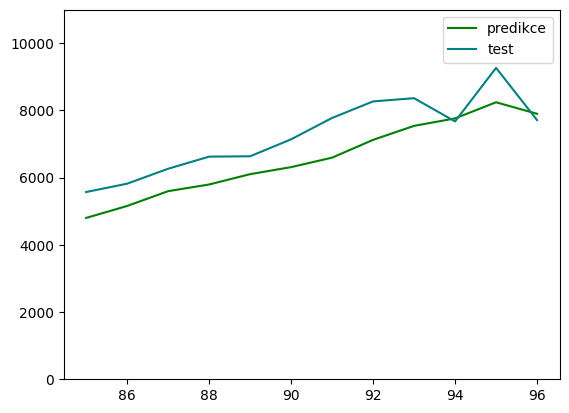

2
                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              2183.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                    1.66e-86
Time:                        15:17:25   Log-Likelihood:                         -637.07
No. Observations:                  84   AIC:                                      1290.
Df Residuals:                      76   BIC:                                      1310.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

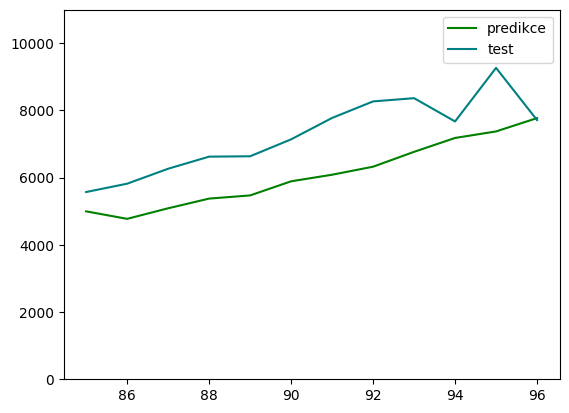

3
                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1430.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                    1.44e-79
Time:                        15:17:26   Log-Likelihood:                         -654.73
No. Observations:                  84   AIC:                                      1325.
Df Residuals:                      76   BIC:                                      1345.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

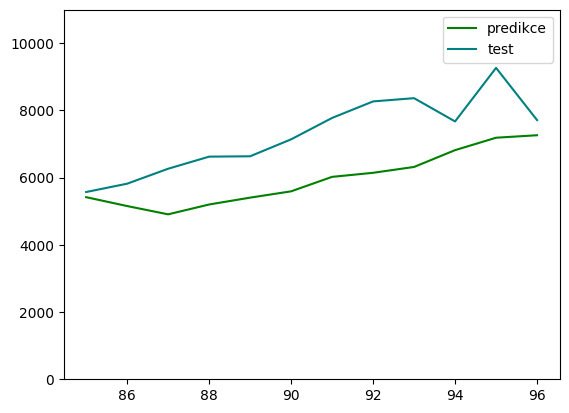

4
                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1248.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                    2.43e-77
Time:                        15:17:26   Log-Likelihood:                         -660.40
No. Observations:                  84   AIC:                                      1337.
Df Residuals:                      76   BIC:                                      1356.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

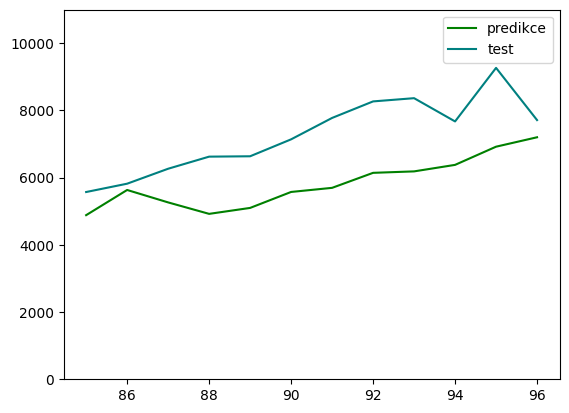

5
                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              1057.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                    1.29e-74
Time:                        15:17:26   Log-Likelihood:                         -667.34
No. Observations:                  84   AIC:                                      1351.
Df Residuals:                      76   BIC:                                      1370.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

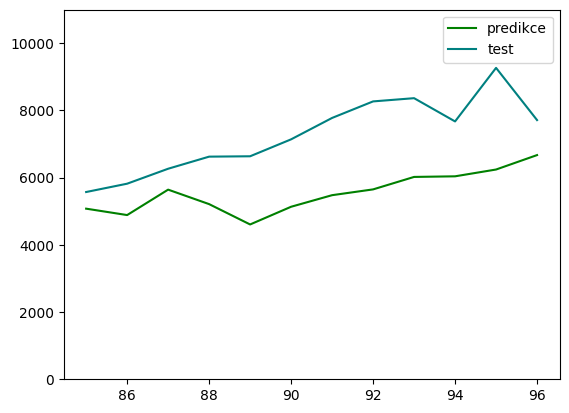

6
                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              868.7
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                    2.04e-71
Time:                        15:17:27   Log-Likelihood:                         -675.49
No. Observations:                  84   AIC:                                      1367.
Df Residuals:                      76   BIC:                                      1386.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [2]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

import statsmodels.api as sm
test = True

df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-12:])
#>>normalizovat dataframe 
#//df=(df-df.min())/(df.max()-df.min())

models = []
predictions = []
rmse_list = []
y_pred_list = []
#>> trenink modelů
for i in range(1,7):
    repo = ['repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7']
    aktivni = ['aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7']
    nove = ['nove-1', 'nove-2', "nove-3", 'nove-4', 'nove-5', 'nove-6', 'nove-7']
    #//cena = ['cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7']
    #//zobrazeni = ['zobrazeni-1','zobrazeni-2','zobrazeni-3','zobrazeni-4','zobrazeni-5','zobrazeni-6','zobrazeni-7']
    doba = ['doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7']
    #* definovat data
    X = df[["datum", *repo[:2], *aktivni[i-1:i+1], *nove[i-1:i+1], *doba[i-1:i]]]
    y = df[['aktivni']]
    #* training dataframe bez randomizace
    X_train = X.drop(X.index[-12:])
    y_train = y.drop(y.index[-12:])
    #* testing dataframe bez randomizace
    X_test = X.drop(X.index[:-12])
    y_test = y.drop(y.index[:-12])
    #*fit OLS reresi na train datech
    model = sm.OLS(y_train,X_train).fit()
    if test:
        # Predict on the test set
        y_pred = model.predict(X_test)
        y_pred_list.append(y_pred)
        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        print(f"Mean absolute error: {mae:.2f}")
        print(f"Mean squared error: {mse:.2f}")
        print(f"Root mean squared error: {rmse:.2f}")
        rmse_list.append(rmse)
        #>>graf
        #*definovat realna data 
        plt.plot(X_test.index, y_pred.values, label='predikce', color="green")
        plt.plot(X_test.index, y_test.values, label='test', color="teal")
        plt.ylim(0, 11000)
        plt.legend()
        plt.show()
        
    #*dotrenovat model na vsech datech
    model = sm.OLS(y,X).fit()
    #*pridat modely do listu pro ulozeni
    models.append(model)
    #*prints
    print(len(models))
    print(model.summary())
    

In [3]:
# Ulozit model
#ulozit model
import pickle
i=1
for model in models:
    filename = f'OLS_model_final_copy_{i}.sav'
    pickle.dump(model, open(filename, 'wb'))
    #ulozit rmse pro modely
    with open('rmse.pkl', 'wb') as file:
        pickle.dump(rmse_list, file)
    i +=1

predikce

   index     datum  predikce
0     97  [202303]      7554
1     98  [202304]      7248
2     99  [202305]      7133
3    100  [202306]      6787
4    101  [202307]      6609
5    102  [202308]      6446


NameError: name 'X' is not defined

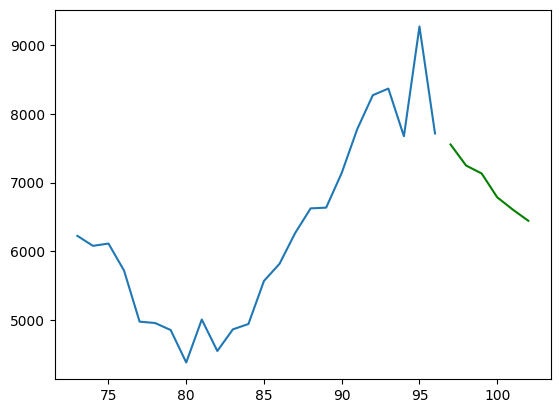

In [1]:

import pickle
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
#df = (df-df.min())/(df.max()-df.min())

test = True
#* definovat listy promenejch
repo = ['repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7']
aktivni = ['aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7']
nove = ['nove-1', 'nove-2', "nove-3", 'nove-4', 'nove-5', 'nove-6', 'nove-7']
#//cena = ['cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7']
#//zobrazeni = ['zobrazeni-1','zobrazeni-2','zobrazeni-3','zobrazeni-4','zobrazeni-5','zobrazeni-6','zobrazeni-7']
doba = ['doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7']

#>> nacist modely a rmse
#* nacist nejlepsi model
models = []
rmse_list = []
for i in range(1,7):
    filename = f'OLS_model_final_copy_{i}.sav'
    model = pickle.load(open(filename, 'rb'))
    models.append(model)
#* nacist rmse pro modely
with open('rmse.pkl', 'rb') as file:
    rmse_values = pickle.load(file)

    
#>> predikce
predictions = []
for i in range(1,7):
    #* vybrat spravny x promeny
    x_new = df.drop(df.index[:-12])
    x_new = x_new[["datum", *repo[i-1:i+1], *aktivni[i-1:i+1], *nove[i-1:i+1], *doba[i-1:i]]]
    #* vybrat spravnej radek a ostatni odstranit
    x_new_pro_graf = x_new
    x_new_pro_graf = x_new_pro_graf.drop(x_new_pro_graf.index[i:])
    x_new_pro_graf = x_new_pro_graf.drop(x_new_pro_graf.index[:-1])
    x_new = x_new.reset_index(drop=True)
    x_new = x_new.drop(x_new.index[i:])
    x_new = x_new.drop(x_new.index[:-1])

    # vybrat spravnej model
    model = models[i-1]
    #*predikce na novych datech
    y_new_pred = model.predict(x_new)
    #>> predikce do dictu
    if test:
        # *vytvorit dict pro predikce
        prediction = {"index" : int(x_new_pro_graf.index.values),
                    "datum": x_new["datum"].values,
                    "predikce": int(y_new_pred)}
    else:
        prediction = {"index" : int(x_new_pro_graf.index.values),
                    "datum": x_new["datum"].values[0],
                    "predikce": int(y_new_pred.values[0])}
    #* pridat predikce do dictu
    predictions.append(prediction)

#* dataframe z predikce dictu
df_predictions = pd.DataFrame(predictions)
print(df_predictions)
#>>graf
#*definovat realna data 
X_graf = df[["datum"]]
Y_graf = df[['aktivni']]
#*cary do budoucnosti
plt.plot(X_graf.index[-36:].values,Y_graf[-36:], label='realita')
plt.plot(df_predictions['index'], df_predictions['predikce'], color="green", label="predikce")
#* cary do minulosti
#//y_test_pred_max = y_pred_list[0] + rmse_values[0]
#//y_test_pred_min = y_pred_list[0] - rmse_values[0]
#* cary s predikcema do minulosti
plt.plot(X.index[-12:], y_pred_list[0].values, label='test', color="orange")
plt.ylim(0, 11000)#zobrazuje graf od 0 na ose y
plt.legend()
plt.show()